# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#create a dataframe from the list above cities collected above and add the column title 'city'
city_info_df = pd.DataFrame(cities, columns=["city"])
city_info_df

,city
0,axim
1,chuy
2,ushuaia
3,mataura
4,carnarvon
...,...
611,san jose
612,atambua
613,kenda
614,ouesso


In [6]:
#add addtional necessary columns to my df
city_info_df['lat'] = ""
city_info_df['lng'] = ""
city_info_df['max temp'] = ""
city_info_df['humidity'] = ""
city_info_df['cloudiness'] = ""
city_info_df['windspeed'] = ""
city_info_df['country'] = ""
city_info_df['date'] = ""
city_info_df.head()

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date
0,axim,,,,,,,,
1,chuy,,,,,,,,
2,ushuaia,,,,,,,,
3,mataura,,,,,,,,
4,carnarvon,,,,,,,,


In [41]:
#set base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#  iterate through the cities (rows) in the city_info_df and for each row build a url to query the api from city
#  and pull in the information for the additional columns, this is done in the 'try
#  in the except, show cities that are not found
for index, row in city_info_df.iterrows():
    city = row['city']
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
    #print(weather_response.json())

    try:
        results = weather_response.json()

        city_info_df.loc[index, 'name'] = results['name']
        city_info_df.loc[index, 'lat'] = results['coord']['lat']
        city_info_df.loc[index, 'lng'] = results['coord']['lon']
        city_info_df.loc[index, 'max temp'] = results['main']['temp_max']
        city_info_df.loc[index, 'humidity'] = results['main']['humidity']
        city_info_df.loc[index, 'cloudiness'] = results['clouds']['all']
        city_info_df.loc[index, 'windspeed'] = results['wind']['speed']
        city_info_df.loc[index, 'country'] = results['sys']['country']
        city_info_df.loc[index, 'date'] = results['dt']
        print(f"city {index+1}, {city}")

    except (KeyError, IndexError):
        print(f"city {city} not found")

city_info_df
    

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


city 1, axim
city 2, chuy


,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date,name
0,axim,4.8699,-2.2405,298.39,91.0,58.0,2.17,GH,1644454604,Esim
1,chuy,-33.6971,-53.4616,291.82,76.0,0.0,3.86,UY,1644454604,Chui
2,ushuaia,-54.8,-68.3,281.96,46.0,40.0,9.26,AR,1644453529,Ushuaia
3,mataura,-46.1927,168.8643,296.19,53.0,44.0,1.12,NZ,1644453529,Mataura
4,carnarvon,-24.8667,113.6333,300.19,69.0,0.0,3.09,AU,1644453529,Carnarvon
...,...,...,...,...,...,...,...,...,...,...
611,san jose,37.3394,-121.895,296.91,30.0,75.0,5.14,US,1644453133,San Jose
612,atambua,-9.1061,124.8925,299.79,80.0,67.0,1.65,ID,1644453701,Atambua
613,kenda,23.2,86.5333,289.68,77.0,100.0,0.93,IN,1644453702,Kenda
614,ouesso,1.6136,16.0517,295.64,33.0,81.0,1.64,CG,1644453702,Ouésso


In [14]:
import scipy.stats as st
import sklearn.datasets as dta
from scipy.stats import sem

In [15]:
city_info_df.count()

city          616
lat           616
lng           616
max temp      616
humidity      616
cloudiness    616
windspeed     616
country       616
date          616
name          558
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#drop rows if humidityis blank
city_info_df = city_info_df[city_info_df['humidity'] != ""]

In [17]:
#convert numeric columns to float type
city_info_df['max temp'] = city_info_df['max temp'].astype(float)
city_info_df['humidity'] = city_info_df['humidity'].astype(float)
city_info_df['cloudiness'] = city_info_df['cloudiness'].astype(float)
city_info_df['windspeed'] = city_info_df['windspeed'].astype(float)

/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_90742/90905824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info_df['max temp'] = city_info_df['max temp'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_90742/90905824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info_df['humidity'] = city_info_df['humidity'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_90742/90905824.py:3: SettingWithCopyWarning: 
A value is trying to be

In [18]:
#drop columns where humidity is greater than 100, conver temp to F
city_df = city_info_df[city_info_df['humidity'] <= 100]
city_df['max temp F'] = (city_df['max temp'] - 273.15) * 9/5 + 32
city_df.head()

,city,lat,lng,max temp,humidity,cloudiness,windspeed,country,date,name,max temp F
0,axim,4.8699,-2.2405,298.39,91.0,58.0,2.17,GH,1644453528,Esim,77.432
1,chuy,-33.6971,-53.4616,291.82,76.0,0.0,3.86,UY,1644453528,Chui,65.606
2,ushuaia,-54.8,-68.3,281.96,46.0,40.0,9.26,AR,1644453529,Ushuaia,47.858
3,mataura,-46.1927,168.8643,296.19,53.0,44.0,1.12,NZ,1644453529,Mataura,73.472
4,carnarvon,-24.8667,113.6333,300.19,69.0,0.0,3.09,AU,1644453529,Carnarvon,80.672


In [19]:
import os
output_path = os.path.join("..", "city_data.csv")

In [20]:
#publish df to csv file
city_df.to_csv(output_path, index=False)

In [21]:
#run functions against columns and store in variable
mean = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].mean()
median = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].median()
mode = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].mode
variance = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].var()
std = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].std()
min = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].min()
max = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].max()
count = city_df[['max temp', 'humidity', 'cloudiness', 'windspeed']].count()
count

max temp      558
humidity      558
cloudiness    558
windspeed     558
dtype: int64

In [22]:
#created df from count of columns above and transposed
df = pd.DataFrame(count)
df = df.T
df



,max temp,humidity,cloudiness,windspeed
0,558,558,558,558


In [23]:
#replaced the index with the function used for the calculation
#this was in the requirements but there was an example of this in the starter code
df = df.rename(index={0:'count'})
df

,max temp,humidity,cloudiness,windspeed
count,558,558,558,558


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

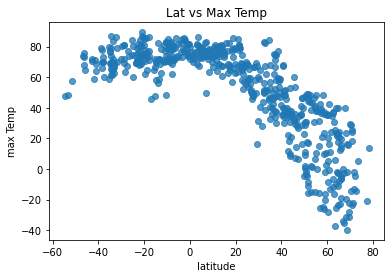

In [24]:
#plot latitude column values against max temp
plt.scatter(city_df['lat'],city_df['max temp F'],marker='o',alpha=0.75)
plt.title("Lat vs Max Temp")
plt.xlabel('latitude')
plt.ylabel('max Temp')
plt.savefig("latvsmaxtemp.png")

The chart above shows how the max temperature changes as the latitude gets further from 0 (further from the equator)

## Latitude vs. Humidity Plot

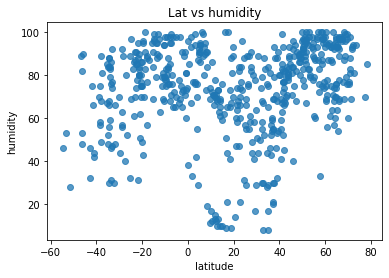

In [37]:
plt.scatter(city_df['lat'],city_df['humidity'],marker='o',alpha=0.75)
plt.title("Lat vs humidity")
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.savefig("latvshumidity.png")

The chart above shows how the humidity changes as the latitude gets further from 0 (further from the equator)

## Latitude vs. Cloudiness Plot

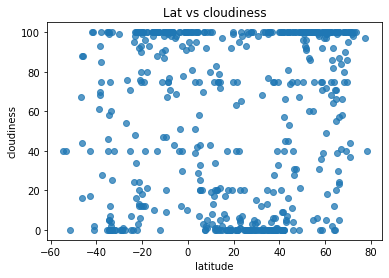

In [38]:
plt.scatter(city_df['lat'],city_df['cloudiness'],marker='o',alpha=0.75)
plt.title("Lat vs cloudiness")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.savefig("latvscloudiness.png")

The chart above shows how the cloudiness rating changes as the latitude gets further from 0 (further from the equator)

## Latitude vs. Wind Speed Plot

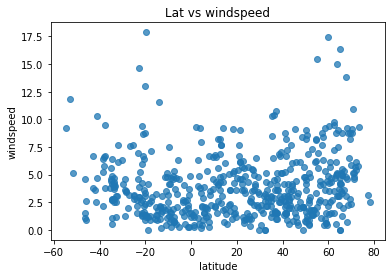

In [39]:
plt.scatter(city_df['lat'],city_df['windspeed'],marker='o',alpha=0.75)
plt.title("Lat vs windspeed")
plt.xlabel('latitude')
plt.ylabel('windspeed')
plt.savefig("latvswindspeed.png")

The chart above shows how the windspeed changes as the latitude gets further from 0 (further from the equator)

## Linear Regression

In [28]:
#create dataframces for cities north and south of the equator
north_city_df = city_df[city_df['lat'] >= 0]
south_city_df = city_df[city_df['lat'] <= 0]
north_city_df['lat'] = north_city_df['lat'].astype(float)
south_city_df['lat'] = south_city_df['lat'].astype(float)

/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_90742/2994345698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_city_df['lat'] = north_city_df['lat'].astype(float)
/var/folders/4s/j3_l93ts54qgnyg57c9s590m0000gn/T/ipykernel_90742/2994345698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_city_df['lat'] = south_city_df['lat'].astype(float)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7071828628158786


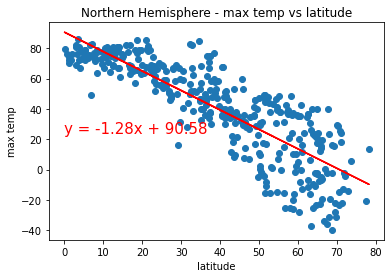

In [29]:
#set variables and create slope / line equation
x_values = north_city_df['lat']
y_values = north_city_df['max temp F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,24),fontsize=15,color="red")
plt.title("Northern Hemisphere - max temp vs latitude")
plt.xlabel('latitude')
plt.ylabel('max temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.11829025799910871


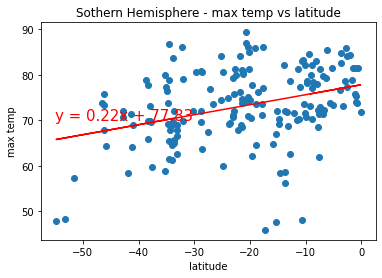

In [30]:
x_values = south_city_df['lat']
y_values = south_city_df['max temp F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.title("Sothern Hemisphere - max temp vs latitude")
plt.xlabel('latitude')
plt.ylabel('max temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12581691983277318


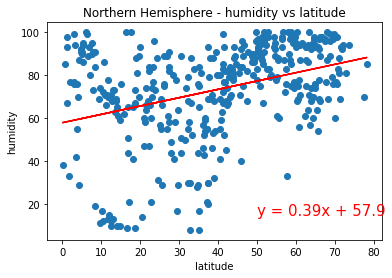

In [31]:
x_values = north_city_df['lat']
y_values = north_city_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - humidity vs latitude")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18453552592044328


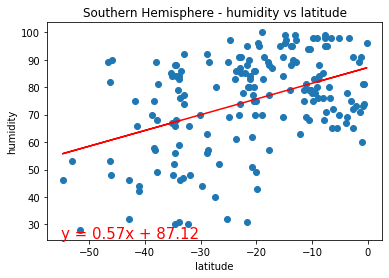

In [32]:
x_values = south_city_df['lat']
y_values = south_city_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - humidity vs latitude")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11853303854028309


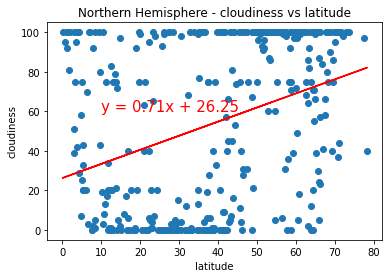

In [33]:
x_values = north_city_df['lat']
y_values = north_city_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.title("Northern Hemisphere - cloudiness vs latitude")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1533240337608105


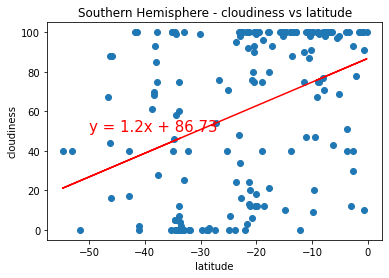

In [34]:
x_values = south_city_df['lat']
y_values = south_city_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - cloudiness vs latitude")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04235084594541142


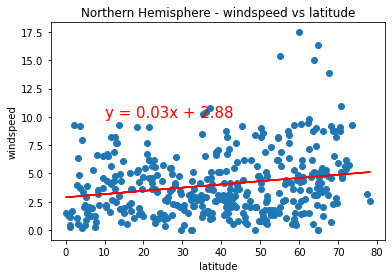

In [35]:
x_values = north_city_df['lat']
y_values = north_city_df['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - windspeed vs latitude")
plt.xlabel('latitude')
plt.ylabel('windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08945236545720402


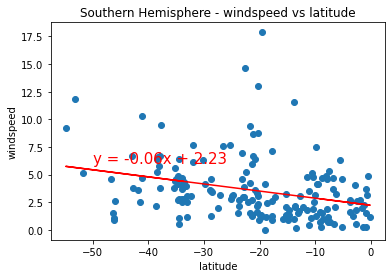

In [36]:
x_values = south_city_df['lat']
y_values = south_city_df['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.title("Southern Hemisphere - windspeed vs latitude")
plt.xlabel('latitude')
plt.ylabel('windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()